In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn/Customer-Churn-Records.csv


## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
import seaborn as sns
sns.set()
sns.set_theme(style="whitegrid")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Loading the Dataset

In [3]:
df = pd.read_csv("/kaggle/input/bank-customer-churn/Customer-Churn-Records.csv")

## Exploring the Data

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

**-> There are 4 object feature and<br>
-> 14 numerical feature**

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [7]:
df.duplicated().sum()

0

**-> There are no duplicate values**

In [8]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [9]:
df["Card Type"].unique()

array(['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM'], dtype=object)

**-> There are 3 countries, France, Spain, and Germany<br>
-> Also there 4 card types, Diamond, Gold, Silver and Platinum<br>** 

In [10]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

**-> There are no null values**

## Data Cleaning
* `RowNumber`, `CustomerId` and `Surname` columns will be dropped, because they have no impact on **churn**.
* `Gender` column's data will be converted from male, female to 0, 1

In [11]:
df.drop(labels=["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

In [12]:
df["Gender"] = df["Gender"].replace({"Male": 0, "Female": 1})

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  int64  
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(11), object(2)
memory usage: 1.1+

## Data Visualization

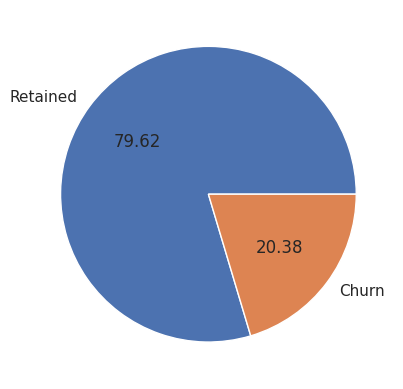

In [14]:
plt.pie(df["Exited"].value_counts(), labels=["Retained", "Churn"], autopct="%0.2f")
plt.show()

**-> Imbalanced data**

In [15]:
count_plt = ['Gender',
            'Tenure',
            'NumOfProducts',
            'HasCrCard',
            'IsActiveMember',
            'Complain',
            'Satisfaction Score',
            'Card Type',
            'Geography']

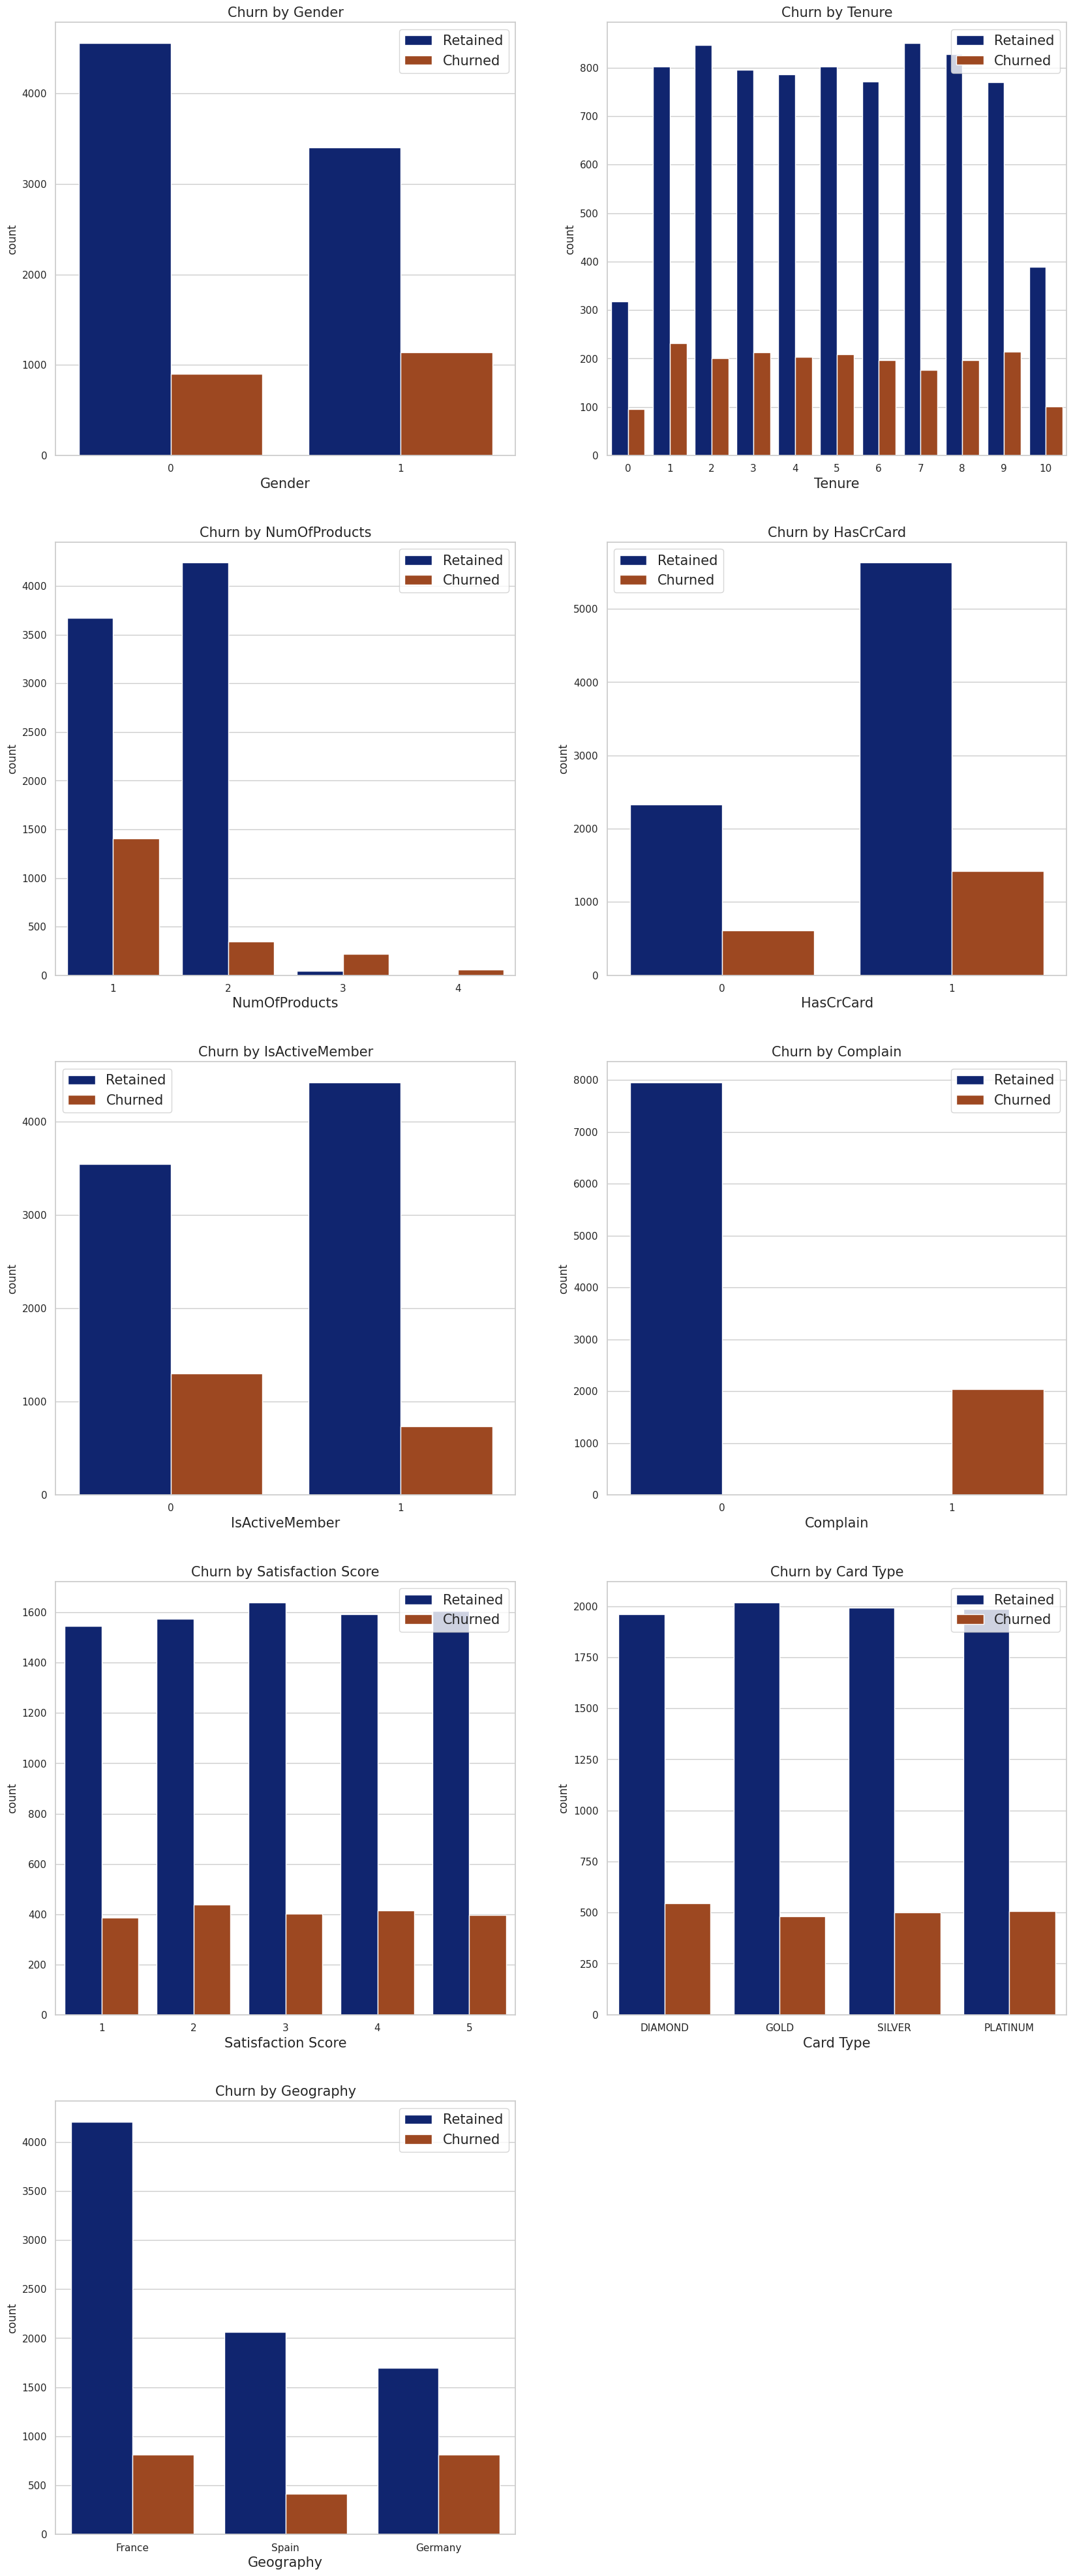

In [16]:
plt.figure(figsize=(20, 50))
for fe, x in zip(count_plt, range(0,len(count_plt))):
    plt.subplot(5, 2, x+1)
    sns.countplot(x=fe, hue='Exited', data=df, palette="dark")
    plt.xlabel(fe, fontsize=15)
    plt.legend(fontsize=15, labels=["Retained", "Churned"])
    plt.title('Churn by ' + fe, fontsize=15)

In [17]:
box_plt = ["CreditScore", "Age", "Balance", "EstimatedSalary", "Point Earned"]

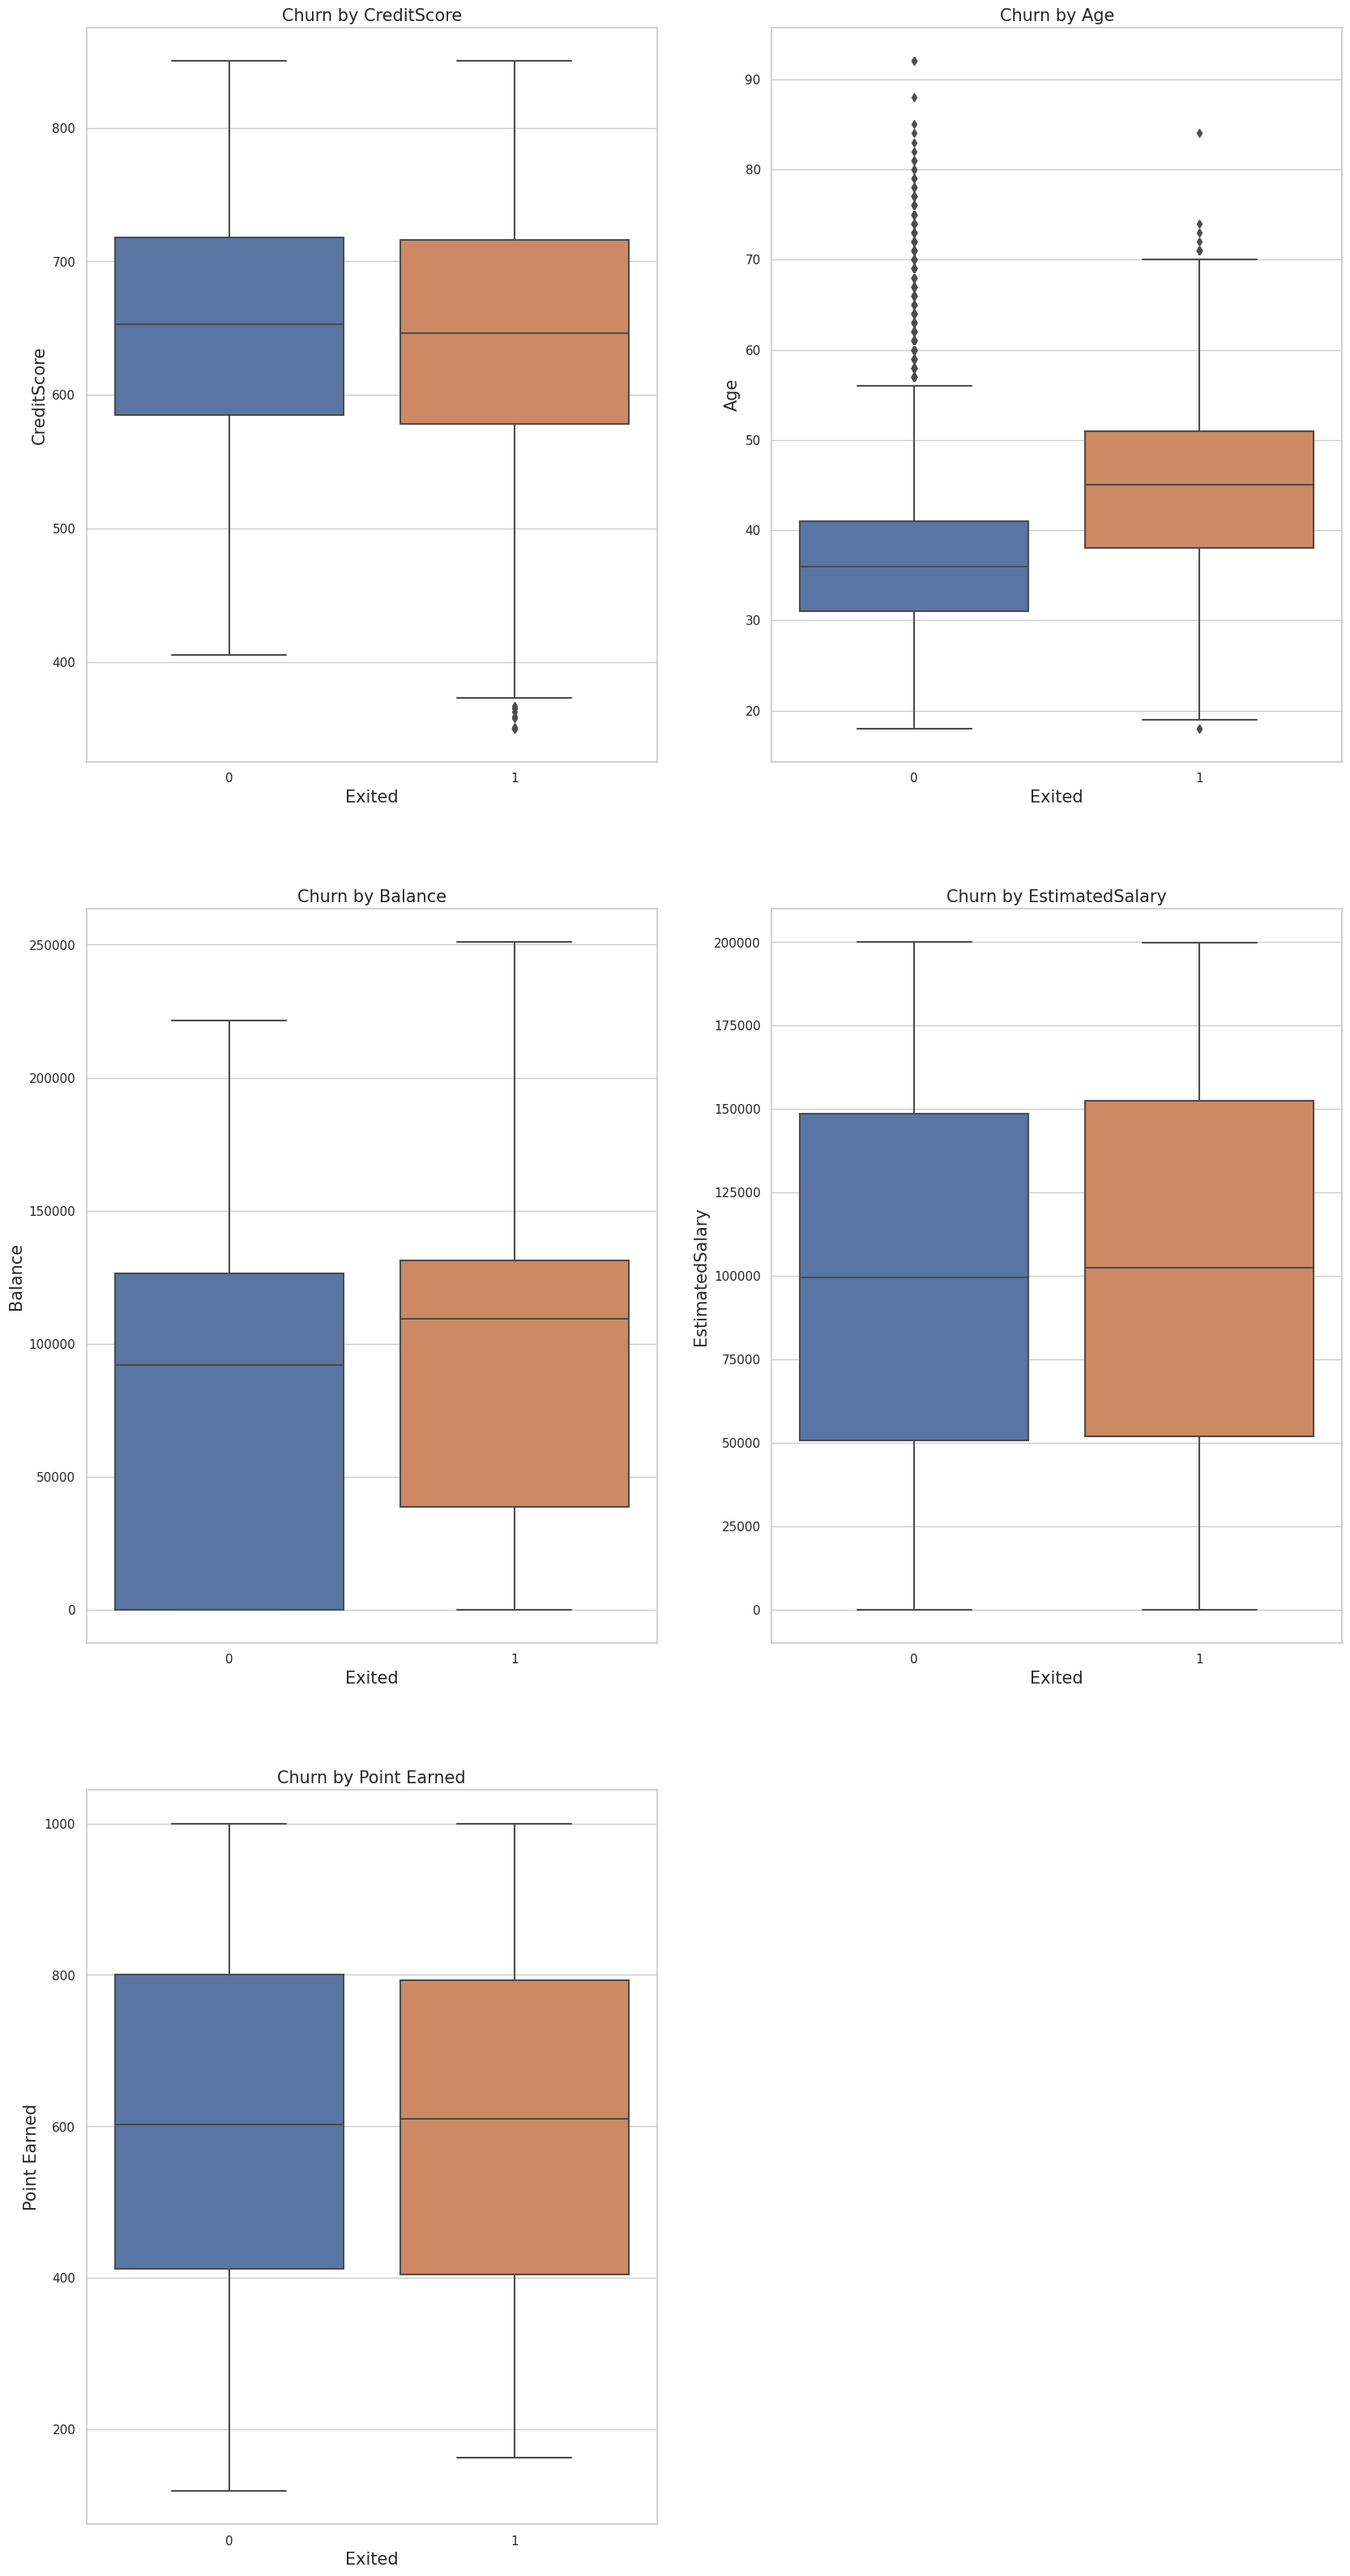

In [18]:
plt.figure(figsize=(20, 40))
for fe, x in zip(box_plt, range(0, len(box_plt))):
    plt.subplot(3, 2, x+1)
    sns.boxplot(x='Exited', y=fe, data=df)
    plt.xlabel("Exited", fontsize=15)
    plt.ylabel(fe, fontsize=15)
    plt.title('Churn by ' + fe, fontsize=15)
    

In [19]:
num_list = df.select_dtypes(exclude=["object"]).columns.tolist()

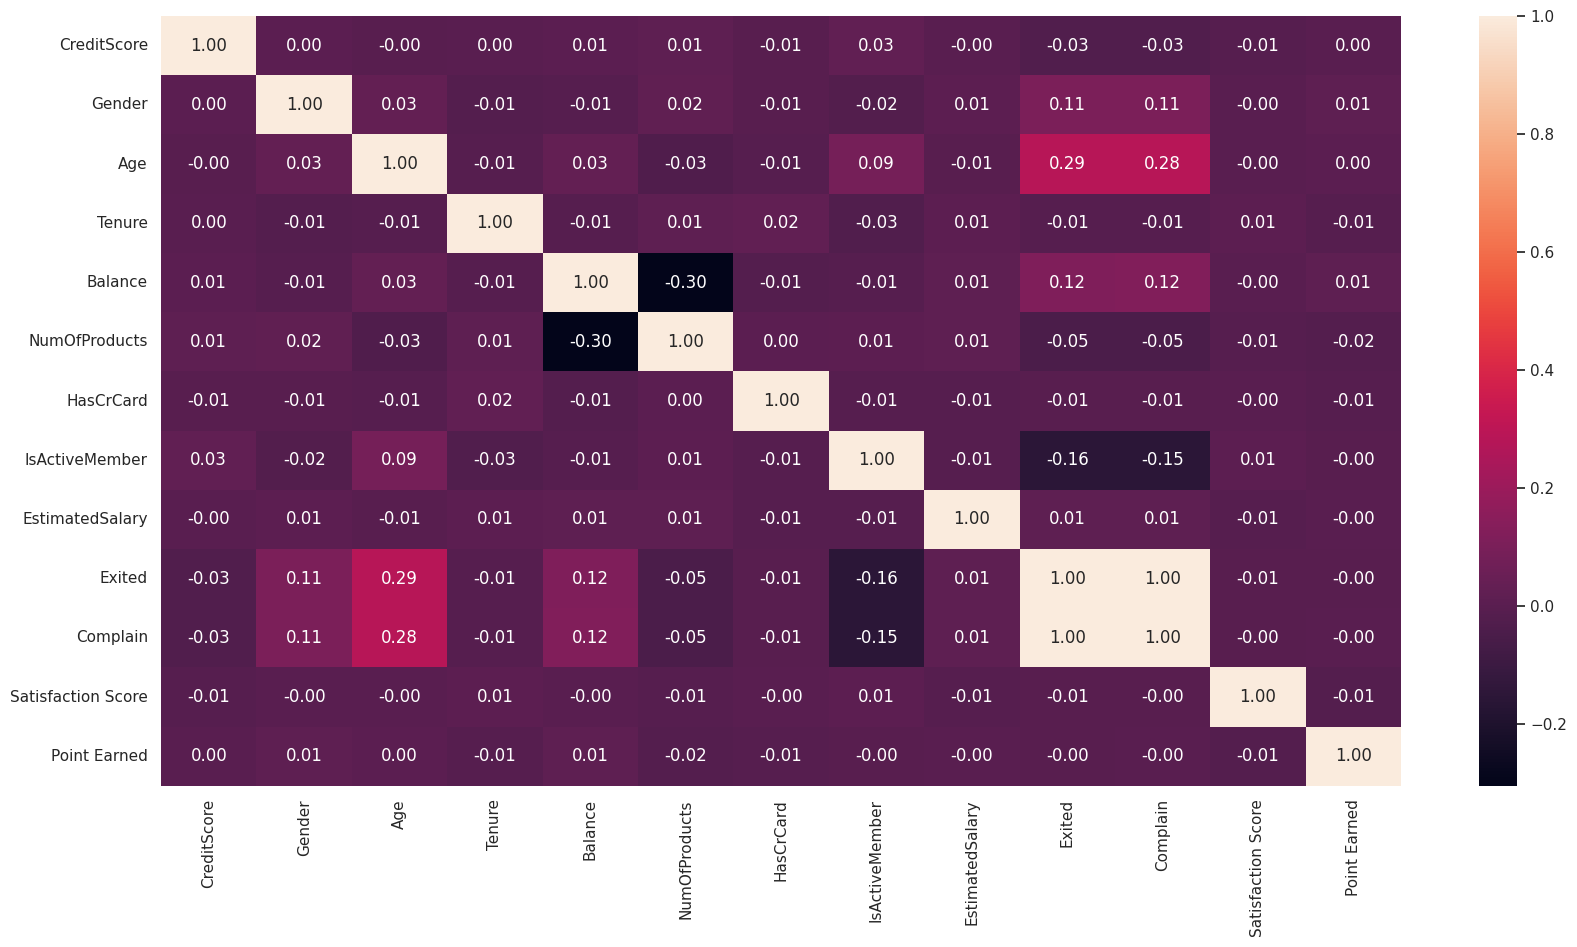

In [20]:
plt.figure(figsize=(20, 10))
sns.heatmap(df[num_list].corr(), annot=True, cbar=True, fmt=".2f")
plt.show()

#### Strong Relation:
- `Complain` and `Exited` have very strong correlation (1.0). That means if someone complain about anything, he or she will left the bank.

#### Moderate Relation:
- `Age` have 0.29 relation with `Exited`, that means bank is not performing well with elderly people. Also elderly people are more likely to complain.
- `Balance` have 0.12 correlation with `Exited`, means that with increasing balance also increases the chance of churn.
- `ActiveMember` and `Exited` are negatively correlated. Members who are active in banking, decreases the tendency of churn.
- In data cleaing process we have converted `Gender` feature. Turned male -> 0 and female -> 1. 
- From this we can say that female are more likely to leave the bank than the male, as the correlation is 0.11. Which means bank is not performing well with female customer. Otherwise male and female both acting almost the same role on other feature's.